In [34]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/All Clinical/cleaned_data.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,P01KPNREV,P01KPNLEV,P01KPACT30,P01HPNR12,P01HPNL12,V00SF2,V00SF3,V00SF8,V00WPRKN1,V00WPRKN2,V00P7RKFR,V00KSXRKN1,V00DIRKN1,V00DIRKN2,V00DIRKN14,V00WPLKN1,V00WPLKN2,V00P7LKFR,V00KSXLKN1,V00DILKN1,V00DILKN2,V00DILKN14,V00KOOSFX5,P02KPNRCV,P02KPNLCV,P01KPR30CV,P01KPL30CV,P01KPACTCV,P01HPR12CV,P01HPL12CV,P01KPA30CV,V00P7RKRCV,V00P7LKRCV,P01PMRKRCV,P01PMLKRCV,V00WOMTSL,V00WOMTSR,P01BL12SXL,P01BL12SXR,...,V00RUBCV,V00CAPSNCV,V00BRACCV,V00YOGACV,V00HERBCV,V00RELACV,V00SPIRCV,P01RASTASV,P02KSURGCV,V00OTHCAMC,V00OTHCAM,V00DISCOMF,V00LFXCOMP,V00LFXPN,V00EKRSL,V00REXPN,V00EKRSR,V00RFXCOMP,V00BPDIAS,V00BPSYS,V00DTVITD,V00DTCALC,V00DTCHOL,V00VITDCV,V00CALCMCV,V00VIT9,V00VIT1,P01BMI,V00PASE,P01FAMKR,P02WTGA,V00RKEFFB,V00RKEFFPT,V00LKEFFB,V00LKEFFPT,V00RKRFXPN,V00LKRFXPN,V00LLWGT,V00RLWGT,cumulative_outcome
0,9000296,Yes,No,No,Yes,No,Not limited at all,Not limited at all,Not at all,None,None,Never,Never,None,None,None,None,None,Never,Never,None,None,None,None,No,No,No,No,No Limits or avoidance,Yes,No,No,No pain,No pain,No pain,No pain,0.0,0.0,Neither,Neither,...,No,No,No,No,No,No,No,Does not report RA/inflam arth,No,No,No,No,Yes,No,No,No,No,Yes,84.0,152.0,73.00,495.5,260.7,Didn t take,Didn t take,No,Yes,29.8,190.0,No,No,No,No,No,No,No,No,12.0,18.0,No
1,9000622,Yes,No,Yes,Yes,No,"Yes, limited a little","Yes, limited a little",Moderately,Mild,Mild,Daily,Sometimes,None,Mild,None,None,None,Never,Never,None,None,None,Moderate,Yes,No,Yes,No,Limits,Yes,No,Yes,3,No pain,2,No pain,0.0,20.9,Neither,Both IEI and SV,...,No,No,No,No,No,No,No,Does not report RA/inflam arth,No,No,No,No,Yes,No,No,No,No,Yes,60.0,136.0,64.36,679.2,70.3,Every day,Every day,Yes,No,22.7,157.0,No,No,No,No,No,No,Yes,No,14.0,14.0,Yes
2,9001695,Yes,No,No,No,No,Not limited at all,Not limited at all,Not at all,None,None,Monthly,Never,None,None,None,None,None,Never,Never,None,None,None,None,No,No,No,No,No Limits or avoidance,No,No,No,1,No pain,1,No pain,0.0,NaN,Neither,Neither,...,No,No,No,No,No,No,No,Does not report RA/inflam arth,No,No,No,No,Yes,No,No,No,No,Yes,70.0,115.0,13.01,447.2,63.1,No vitamins/minerals taken in past year,No vitamins/minerals taken in past year,No,No,28.6,280.0,Yes,No,Yes,Yes,No,No,No,No,13.0,13.0,Yes
3,9001897,No,No,No,No,No,Not limited at all,Not limited at all,Not at all,None,None,Never,Never,None,None,None,None,None,Never,Never,None,None,None,None,Yes,No,No,No,No Limits or avoidance,No,No,No,No pain,No pain,No pain,No pain,0.0,0.0,Neither,IEI only,...,No,No,No,No,No,No,No,Does not report RA/inflam arth,No,No,No,No,Yes,No,No,No,No,Yes,82.0,150.0,228.89,785.9,57.7,1-3 days per week,1-3 days per week,Yes,Yes,25.9,156.0,No,No,Yes,No,No,No,No,No,16.0,17.0,Yes
4,9002411,Yes,No,No,No,No,"Yes, limited a little","Yes, limited a little",A little bit,None,Mild,Never,Never,None,Mild,None,None,None,Never,Never,None,Mild,None,None,No,No,No,No,No Limits or avoidance,No,No,No,No pain,No pain,No pain,No pain,1.1,2.1,Neither,Neither,...,No,No,No,No,No,No,No,Does not report RA/inflam arth,No,No,No,No,Yes,No,No,No,No,Yes,60.0,110.0,29.25,551.3,164.4,Didn t take,Didn t take,No,No,31.8,54.0,No,Yes,No,No,No,No,No,No,18.0,22.0,No


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3702 entries, 0 to 3701
Columns: 122 entries, ID to cumulative_outcome
dtypes: float64(17), int64(1), object(104)
memory usage: 3.4+ MB


In [36]:
## Replace 'No' and 'Yes' by 0 and 1 in the outcome column

df['cumulative_outcome'] = df['cumulative_outcome'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,ID,P01KPNREV,P01KPNLEV,P01KPACT30,P01HPNR12,P01HPNL12,V00SF2,V00SF3,V00SF8,V00WPRKN1,V00WPRKN2,V00P7RKFR,V00KSXRKN1,V00DIRKN1,V00DIRKN2,V00DIRKN14,V00WPLKN1,V00WPLKN2,V00P7LKFR,V00KSXLKN1,V00DILKN1,V00DILKN2,V00DILKN14,V00KOOSFX5,P02KPNRCV,P02KPNLCV,P01KPR30CV,P01KPL30CV,P01KPACTCV,P01HPR12CV,P01HPL12CV,P01KPA30CV,V00P7RKRCV,V00P7LKRCV,P01PMRKRCV,P01PMLKRCV,V00WOMTSL,V00WOMTSR,P01BL12SXL,P01BL12SXR,...,V00RUBCV,V00CAPSNCV,V00BRACCV,V00YOGACV,V00HERBCV,V00RELACV,V00SPIRCV,P01RASTASV,P02KSURGCV,V00OTHCAMC,V00OTHCAM,V00DISCOMF,V00LFXCOMP,V00LFXPN,V00EKRSL,V00REXPN,V00EKRSR,V00RFXCOMP,V00BPDIAS,V00BPSYS,V00DTVITD,V00DTCALC,V00DTCHOL,V00VITDCV,V00CALCMCV,V00VIT9,V00VIT1,P01BMI,V00PASE,P01FAMKR,P02WTGA,V00RKEFFB,V00RKEFFPT,V00LKEFFB,V00LKEFFPT,V00RKRFXPN,V00LKRFXPN,V00LLWGT,V00RLWGT,cumulative_outcome
0,9000296,Yes,No,No,Yes,No,Not limited at all,Not limited at all,Not at all,None,None,Never,Never,None,None,None,None,None,Never,Never,None,None,None,None,No,No,No,No,No Limits or avoidance,Yes,No,No,No pain,No pain,No pain,No pain,0.0,0.0,Neither,Neither,...,No,No,No,No,No,No,No,Does not report RA/inflam arth,No,No,No,No,Yes,No,No,No,No,Yes,84.0,152.0,73.00,495.5,260.7,Didn t take,Didn t take,No,Yes,29.8,190.0,No,No,No,No,No,No,No,No,12.0,18.0,0
1,9000622,Yes,No,Yes,Yes,No,"Yes, limited a little","Yes, limited a little",Moderately,Mild,Mild,Daily,Sometimes,None,Mild,None,None,None,Never,Never,None,None,None,Moderate,Yes,No,Yes,No,Limits,Yes,No,Yes,3,No pain,2,No pain,0.0,20.9,Neither,Both IEI and SV,...,No,No,No,No,No,No,No,Does not report RA/inflam arth,No,No,No,No,Yes,No,No,No,No,Yes,60.0,136.0,64.36,679.2,70.3,Every day,Every day,Yes,No,22.7,157.0,No,No,No,No,No,No,Yes,No,14.0,14.0,1
2,9001695,Yes,No,No,No,No,Not limited at all,Not limited at all,Not at all,None,None,Monthly,Never,None,None,None,None,None,Never,Never,None,None,None,None,No,No,No,No,No Limits or avoidance,No,No,No,1,No pain,1,No pain,0.0,NaN,Neither,Neither,...,No,No,No,No,No,No,No,Does not report RA/inflam arth,No,No,No,No,Yes,No,No,No,No,Yes,70.0,115.0,13.01,447.2,63.1,No vitamins/minerals taken in past year,No vitamins/minerals taken in past year,No,No,28.6,280.0,Yes,No,Yes,Yes,No,No,No,No,13.0,13.0,1
3,9001897,No,No,No,No,No,Not limited at all,Not limited at all,Not at all,None,None,Never,Never,None,None,None,None,None,Never,Never,None,None,None,None,Yes,No,No,No,No Limits or avoidance,No,No,No,No pain,No pain,No pain,No pain,0.0,0.0,Neither,IEI only,...,No,No,No,No,No,No,No,Does not report RA/inflam arth,No,No,No,No,Yes,No,No,No,No,Yes,82.0,150.0,228.89,785.9,57.7,1-3 days per week,1-3 days per week,Yes,Yes,25.9,156.0,No,No,Yes,No,No,No,No,No,16.0,17.0,1
4,9002411,Yes,No,No,No,No,"Yes, limited a little","Yes, limited a little",A little bit,None,Mild,Never,Never,None,Mild,None,None,None,Never,Never,None,Mild,None,None,No,No,No,No,No Limits or avoidance,No,No,No,No pain,No pain,No pain,No pain,1.1,2.1,Neither,Neither,...,No,No,No,No,No,No,No,Does not report RA/inflam arth,No,No,No,No,Yes,No,No,No,No,Yes,60.0,110.0,29.25,551.3,164.4,Didn t take,Didn t take,No,No,31.8,54.0,No,Yes,No,No,No,No,No,No,18.0,22.0,0


In [37]:
# Drop first column (ID of the patient)

df = df.drop('ID', axis='columns')


# Convert to dummies

columns_dummies = []

for col in df.columns:
  if df[col].dtype != 'float64' and df[col].dtype != 'int64':
    columns_dummies.append(col)

print(f'Number of columns to dummy encode = {len(columns_dummies)} out of {len(df.columns)}')


df_enc = pd.get_dummies(df, columns = columns_dummies, drop_first = True)

Number of columns to dummy encode = 103 out of 121


In [38]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3702 entries, 0 to 3701
Columns: 228 entries, V00WOMTSL to V00LKRFXPN_Yes
dtypes: float64(17), int64(1), uint8(210)
memory usage: 1.2 MB


In [39]:
df_enc.head()

,V00WOMTSL,V00WOMTSR,P01KPACDCV,V00COMORB,V00HT25MM,V00WT25KG,V00WTMAXKG,V00WTMINKG,V00BPDIAS,V00BPSYS,V00DTVITD,V00DTCALC,V00DTCHOL,P01BMI,V00PASE,V00LLWGT,V00RLWGT,cumulative_outcome,P01KPNREV_Yes,P01KPNLEV_Yes,P01KPACT30_Yes,P01HPNR12_Yes,P01HPNL12_Yes,"V00SF2_Yes, limited a little","V00SF2_Yes, limited a lot","V00SF3_Yes, limited a little","V00SF3_Yes, limited a lot",V00SF8_Extremely,V00SF8_Moderately,V00SF8_Not at all,V00SF8_Quite a bit,V00WPRKN1_Mild,V00WPRKN1_Moderate,V00WPRKN1_None,V00WPRKN1_Severe,V00WPRKN2_Mild,V00WPRKN2_Moderate,V00WPRKN2_None,V00WPRKN2_Severe,V00P7RKFR_Daily,...,V00HERBCV_Yes,V00RELACV_Yes,V00SPIRCV_Yes,"P01RASTASV_DK to RA/inflam arth, no/dk to meds",P01RASTASV_Does not report RA/inflam arth,"P01RASTASV_Report RA/inflam arth, dk to all meds","P01RASTASV_Report RA/inflam arth, no to all meds","P01RASTASV_Report RA/inflam arth, no/dk to meds",P02KSURGCV_Yes,V00OTHCAMC_Yes,V00OTHCAM_Yes,V00DISCOMF_Yes,V00LFXCOMP_Yes,V00LFXPN_Yes,V00EKRSL_Yes,V00REXPN_Yes,V00EKRSR_Yes,V00RFXCOMP_Yes,V00VITDCV_4-6 days per week,V00VITDCV_A few days per month,V00VITDCV_Didn t take,V00VITDCV_Every day,V00VITDCV_No vitamins/minerals taken in past year,V00CALCMCV_4-6 days per week,V00CALCMCV_A few days per month,V00CALCMCV_Didn t take,V00CALCMCV_Every day,V00CALCMCV_No vitamins/minerals taken in past year,V00VIT9_Yes,V00VIT1_Yes,P01FAMKR_Yes,P02WTGA_Yes,V00RKEFFB_Yes,V00RKEFFPT_Too tender to examine,V00RKEFFPT_Yes,V00LKEFFB_Yes,V00LKEFFPT_Too tender to examine,V00LKEFFPT_Yes,V00RKRFXPN_Yes,V00LKRFXPN_Yes
0,0.0,0.0,0.0,0.0,1727.2,75.0,84.1,72.7,84.0,152.0,73.00,495.5,260.7,29.8,190.0,12.0,18.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,20.9,15.0,1.0,1625.6,54.5,62.3,50.9,60.0,136.0,64.36,679.2,70.3,22.7,157.0,14.0,14.0,1,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.0,NaN,0.0,0.0,1625.6,59.1,79.5,52.3,70.0,115.0,13.01,447.2,63.1,28.6,280.0,13.0,13.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0
3,0.0,0.0,0.0,0.0,1778.0,79.5,84.1,70.5,82.0,150.0,228.89,785.9,57.7,25.9,156.0,16.0,17.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
4,1.1,2.1,0.0,0.0,1879.6,81.8,106.8,45.5,60.0,110.0,29.25,551.3,164.4,31.8,54.0,18.0,22.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [40]:
#Removing NAN values
columns_with_nan_values = []
for col in df_enc.columns:
  if df_enc[col].isnull().values.any() == True:
    columns_with_nan_values.append(col)

print(columns_with_nan_values)

['V00WOMTSL', 'V00WOMTSR', 'P01KPACDCV', 'V00COMORB', 'V00HT25MM', 'V00WT25KG', 'V00WTMAXKG', 'V00WTMINKG', 'V00BPDIAS', 'V00BPSYS', 'V00DTVITD', 'V00DTCALC', 'V00DTCHOL', 'P01BMI', 'V00PASE', 'V00LLWGT', 'V00RLWGT']


In [41]:
for col in columns_with_nan_values:
  col_mean = df[col].describe()['mean']
  df_enc[col] = df[col].fillna(col_mean)

df_enc.head()

,V00WOMTSL,V00WOMTSR,P01KPACDCV,V00COMORB,V00HT25MM,V00WT25KG,V00WTMAXKG,V00WTMINKG,V00BPDIAS,V00BPSYS,V00DTVITD,V00DTCALC,V00DTCHOL,P01BMI,V00PASE,V00LLWGT,V00RLWGT,cumulative_outcome,P01KPNREV_Yes,P01KPNLEV_Yes,P01KPACT30_Yes,P01HPNR12_Yes,P01HPNL12_Yes,"V00SF2_Yes, limited a little","V00SF2_Yes, limited a lot","V00SF3_Yes, limited a little","V00SF3_Yes, limited a lot",V00SF8_Extremely,V00SF8_Moderately,V00SF8_Not at all,V00SF8_Quite a bit,V00WPRKN1_Mild,V00WPRKN1_Moderate,V00WPRKN1_None,V00WPRKN1_Severe,V00WPRKN2_Mild,V00WPRKN2_Moderate,V00WPRKN2_None,V00WPRKN2_Severe,V00P7RKFR_Daily,...,V00HERBCV_Yes,V00RELACV_Yes,V00SPIRCV_Yes,"P01RASTASV_DK to RA/inflam arth, no/dk to meds",P01RASTASV_Does not report RA/inflam arth,"P01RASTASV_Report RA/inflam arth, dk to all meds","P01RASTASV_Report RA/inflam arth, no to all meds","P01RASTASV_Report RA/inflam arth, no/dk to meds",P02KSURGCV_Yes,V00OTHCAMC_Yes,V00OTHCAM_Yes,V00DISCOMF_Yes,V00LFXCOMP_Yes,V00LFXPN_Yes,V00EKRSL_Yes,V00REXPN_Yes,V00EKRSR_Yes,V00RFXCOMP_Yes,V00VITDCV_4-6 days per week,V00VITDCV_A few days per month,V00VITDCV_Didn t take,V00VITDCV_Every day,V00VITDCV_No vitamins/minerals taken in past year,V00CALCMCV_4-6 days per week,V00CALCMCV_A few days per month,V00CALCMCV_Didn t take,V00CALCMCV_Every day,V00CALCMCV_No vitamins/minerals taken in past year,V00VIT9_Yes,V00VIT1_Yes,P01FAMKR_Yes,P02WTGA_Yes,V00RKEFFB_Yes,V00RKEFFPT_Too tender to examine,V00RKEFFPT_Yes,V00LKEFFB_Yes,V00LKEFFPT_Too tender to examine,V00LKEFFPT_Yes,V00RKRFXPN_Yes,V00LKRFXPN_Yes
0,0.0,0.000000,0.0,0.0,1727.2,75.0,84.1,72.7,84.0,152.0,73.00,495.5,260.7,29.8,190.0,12.0,18.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,20.900000,15.0,1.0,1625.6,54.5,62.3,50.9,60.0,136.0,64.36,679.2,70.3,22.7,157.0,14.0,14.0,1,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.0,10.076808,0.0,0.0,1625.6,59.1,79.5,52.3,70.0,115.0,13.01,447.2,63.1,28.6,280.0,13.0,13.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0
3,0.0,0.000000,0.0,0.0,1778.0,79.5,84.1,70.5,82.0,150.0,228.89,785.9,57.7,25.9,156.0,16.0,17.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
4,1.1,2.100000,0.0,0.0,1879.6,81.8,106.8,45.5,60.0,110.0,29.25,551.3,164.4,31.8,54.0,18.0,22.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [42]:
## Check if there are still NaN values in data frame
df_enc.isnull().values.any()

False

In [43]:
## Rename columns to have format usable with the Stats Model Formula input

print('Before = ', df_enc.columns)

# Replace all spaces and symbols by underscores

df_enc.columns = df_enc.columns.str.replace(' ', '_')
df_enc.columns = df_enc.columns.str.replace(',', '_')
df_enc.columns = df_enc.columns.str.replace(':', '_')
df_enc.columns = df_enc.columns.str.replace('/', '_')
df_enc.columns = df_enc.columns.str.replace('-', '_')

print('After = ', df_enc.columns)

Before =  Index(['V00WOMTSL', 'V00WOMTSR', 'P01KPACDCV', 'V00COMORB', 'V00HT25MM',
       'V00WT25KG', 'V00WTMAXKG', 'V00WTMINKG', 'V00BPDIAS', 'V00BPSYS',
       ...
       'P01FAMKR_Yes', 'P02WTGA_Yes', 'V00RKEFFB_Yes',
       'V00RKEFFPT_Too tender to examine', 'V00RKEFFPT_Yes', 'V00LKEFFB_Yes',
       'V00LKEFFPT_Too tender to examine', 'V00LKEFFPT_Yes', 'V00RKRFXPN_Yes',
       'V00LKRFXPN_Yes'],
      dtype='object', length=228)
After =  Index(['V00WOMTSL', 'V00WOMTSR', 'P01KPACDCV', 'V00COMORB', 'V00HT25MM',
       'V00WT25KG', 'V00WTMAXKG', 'V00WTMINKG', 'V00BPDIAS', 'V00BPSYS',
       ...
       'P01FAMKR_Yes', 'P02WTGA_Yes', 'V00RKEFFB_Yes',
       'V00RKEFFPT_Too_tender_to_examine', 'V00RKEFFPT_Yes', 'V00LKEFFB_Yes',
       'V00LKEFFPT_Too_tender_to_examine', 'V00LKEFFPT_Yes', 'V00RKRFXPN_Yes',
       'V00LKRFXPN_Yes'],
      dtype='object', length=228)


In [44]:
#Splitting trainig and testing data
from sklearn.model_selection import train_test_split

y = df_enc['cumulative_outcome']
x = df_enc.drop(['cumulative_outcome'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,  
                                                    stratify=df['cumulative_outcome'],
                                                    random_state=88,)
x_train.shape, x_test.shape

((2591, 227), (1111, 227))

In [45]:
negative = np.sum(y_train == 0)
positive = np.sum(y_train == 1)
print(pd.Series({'0': negative, '1': positive}))

0    1510
1    1081
dtype: int64


In [46]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.001,
                             criterion = 'gini',
                             random_state = 88)

dtc = dtc.fit(x_train, y_train)

Node count = 289


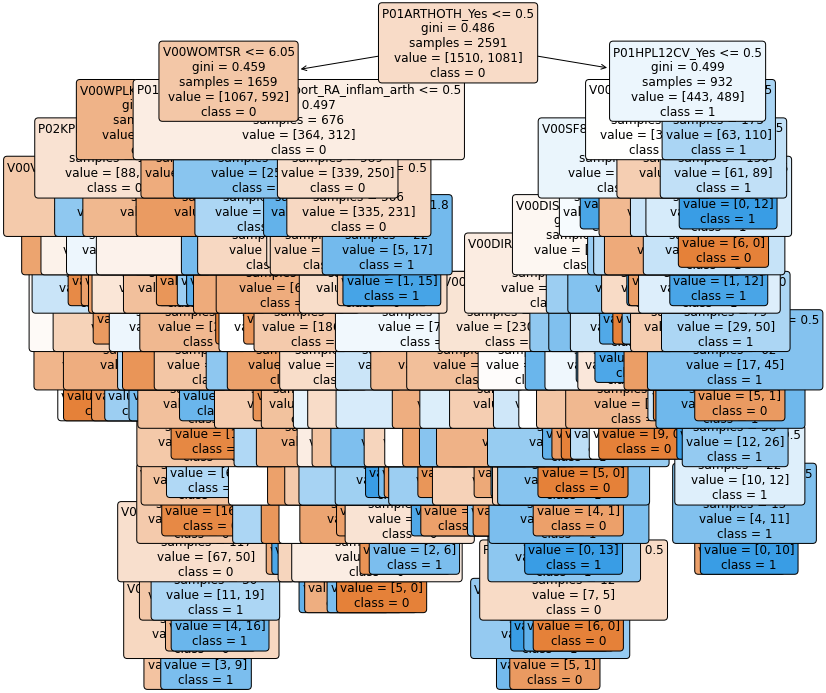

In [47]:
#Building the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('Node count =', dtc.tree_.node_count)
plt.figure(figsize=(12,12))
plot_tree(dtc, 
          feature_names=x_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) 
plt.show()

Node count = 5


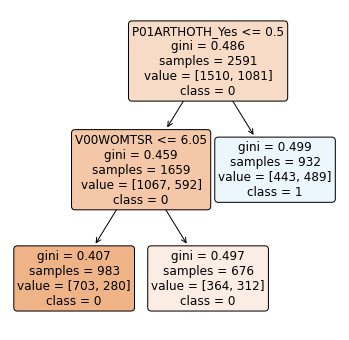

In [48]:
# Try increasing the complexity parameter to prune the tree
# sklearn uses same impurity function in both training and pruning phases

dtc2 = DecisionTreeClassifier(min_samples_leaf=5, 
                              ccp_alpha=0.005,
                              random_state = 88)

dtc2 = dtc2.fit(x_train, y_train)

print('Node count =', dtc2.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc2, 
          feature_names=x_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12)  
plt.show() 

In [49]:
# MAKE PREDICTIONS 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Recall is also called sensitiviy or TPR := tp / (tp + fn)
#Precision := tp / (tp + fp)

y_pred = dtc2.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
print('Accuracy :',precision_score(y_test, y_pred))
print('True positive Rate:',recall_score(y_test, y_pred))

Confusion Matrix : 
 [[447 200]
 [231 233]]
Accuracy : 0.5381062355658198
True positive Rate: 0.5021551724137931


In [50]:
#Cross Validation
y = df_enc['cumulative_outcome']
x = df_enc.drop(['cumulative_outcome'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,  
                                                    stratify=df['cumulative_outcome'],
                                                    random_state=88,)

In [51]:
from sklearn.model_selection import GridSearchCV

#Exhaustive search over specified parameter values for an estimator.

grid_values = {'ccp_alpha': np.linspace(0.0, 0.001, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 
# default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(x_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-06, 1.00e-05, 1.50e-05, 2.00e-05, 2.50e-05,
       3.00e-05, 3.50e-05, 4.00e-05, 4.50e-05, 5.00e-05, 5.50e-05,
       6.00e-05, 6.50e-05, 7.00e-05, 7.50e-05, 8.00e-05, 8.50e-05,
       9.00e-05, 9.50e-05, 1.00e-04, 1.05e-04, 1.10e-04, 1.15e-04,
       1.20e-04, 1.25e-04, 1.30e-04, 1.35e-04, 1.40e-04, 1.45...
       8.70e-04, 8.75e-04, 8.80e-04, 8.85e-04, 8.90e-04, 8.95e-04,
       9.00e-04, 9.05e-04, 9.10e-04, 9.15e-04, 9.20e-04, 9.25e-04,
       9.30e-04, 9.35e-04, 9.40e-04, 9.45e-04, 9.50e-04, 9.55e-04,
       9.60e-04, 9.65e-04, 9.70e-04, 9.75e-04, 9.80e-04, 9.85e-04,
       9.90e-04, 9.95e-04, 1.00e-03]),
                         'class_weight': [{0: 1, 1: 20}], 'max_depth': [30],
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             scoring='accuracy', verbose=1)

In [52]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] 
# what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)

,ccp alpha,Validation Accuracy
0,0,0.491691
1,5e-06,0.491691
2,1e-05,0.491691
3,1.5e-05,0.491691
4,2e-05,0.491691
5,2.5e-05,0.491691
6,3e-05,0.491691
7,3.5e-05,0.491691
8,4e-05,0.491691
9,4.5e-05,0.491691


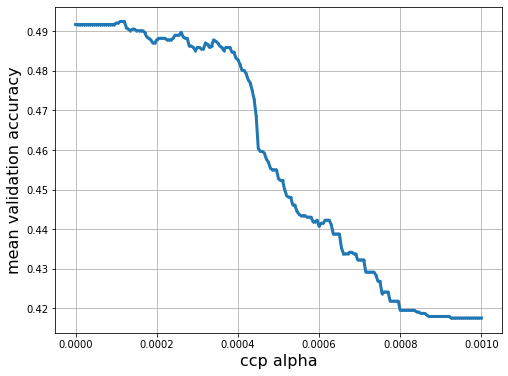

In [53]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [54]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.00011
Grid best score (accuracy):  0.49246361746361744


Node count = 301


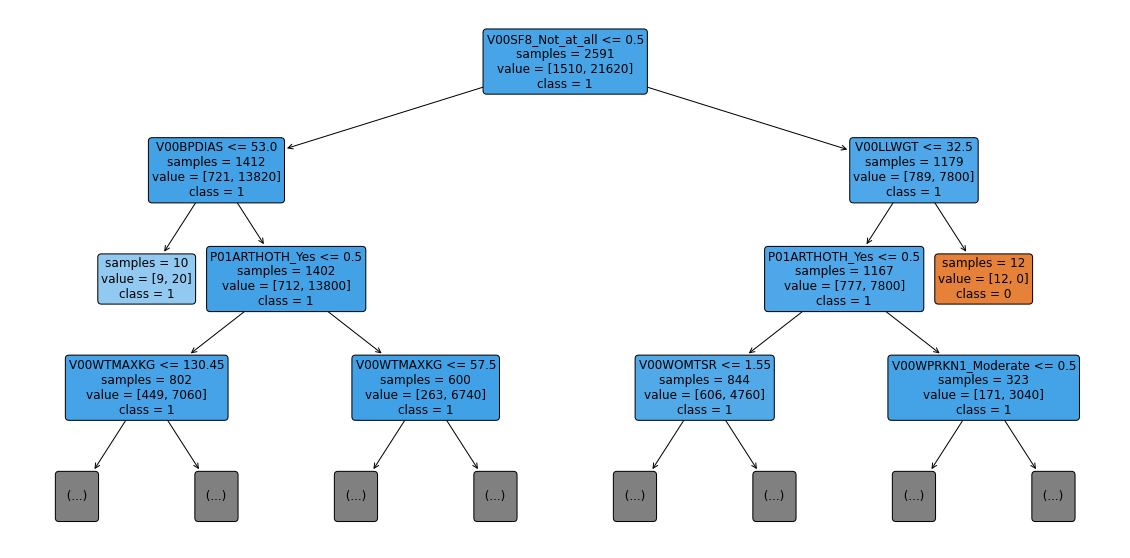

In [55]:
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=x_train.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [56]:
y_pred = dtc_cv_acc.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
print('Accuracy:',precision_score(y_test, y_pred))
print('True Positive Rate:',recall_score(y_test, y_pred))

Confusion Matrix : 
 [[169 478]
 [112 352]]
Accuracy: 0.42409638554216866
True Positive Rate: 0.7586206896551724


In [57]:
#Assigning importance score to all features
pd.DataFrame({'Feature' : x_train.columns, 
              'Importance score': 100*dtc_cv_acc.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,V00WOMTSL,1.4
1,V00WOMTSR,3.5
2,P01KPACDCV,2.2
3,V00COMORB,0.1
4,V00HT25MM,5.2
...,...,...
222,V00LKEFFB_Yes,0.0
223,V00LKEFFPT_Too_tender_to_examine,0.0
224,V00LKEFFPT_Yes,0.0
225,V00RKRFXPN_Yes,0.0


Feature: V00DTVITD                           Importance: 12.355985686785127
Feature: V00DTCHOL                           Importance: 10.275830602221943
Feature: V00HT25MM                           Importance: 5.229162154281362
Feature: V00PASE                             Importance: 4.899401351378334
Feature: V00WT25KG                           Importance: 4.734747839206159
Feature: V00LLWGT                            Importance: 4.19123543489569
Feature: V00BPDIAS                           Importance: 3.984841715262118
Feature: P01BMI                              Importance: 3.9756774976626295
Feature: V00WOMTSR                           Importance: 3.5440024582254113
Feature: V00BPSYS                            Importance: 3.185886334791043
Feature: V00RLWGT                            Importance: 3.0201596498489436
Feature: V00WTMAXKG                          Importance: 2.9423062536620987
Feature: V00DTCALC                           Importance: 2.531651932466914
Feature: P01KPACDCV 

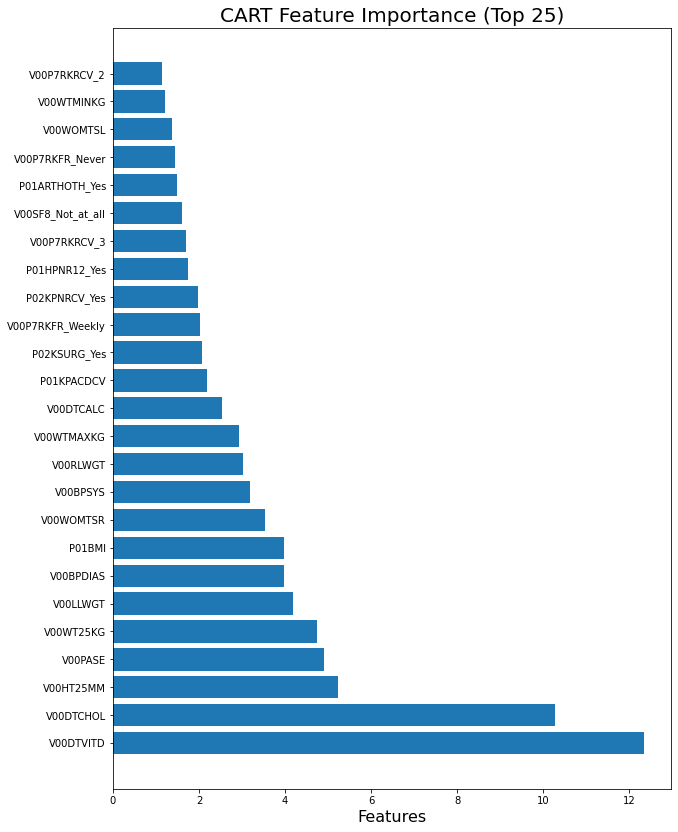

In [58]:
pd.DataFrame({'Feature' : x_train.columns, 
              'Importance score': 100*dtc_cv_acc.best_estimator_.feature_importances_}).round(1)

feature_importances = list(zip(x_train.columns,100*dtc_cv_acc.best_estimator_.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked[:25]];


# Plot the top 25 feature importance
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('CART Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

In [66]:
#Decision Tree classifier with just the 25 top features
x_train_new = x_train[feature_names_25]
x_test_new = x_test[feature_names_25]

dtc_new = dtc.fit(x_train_new, y_train)

Node count = 249


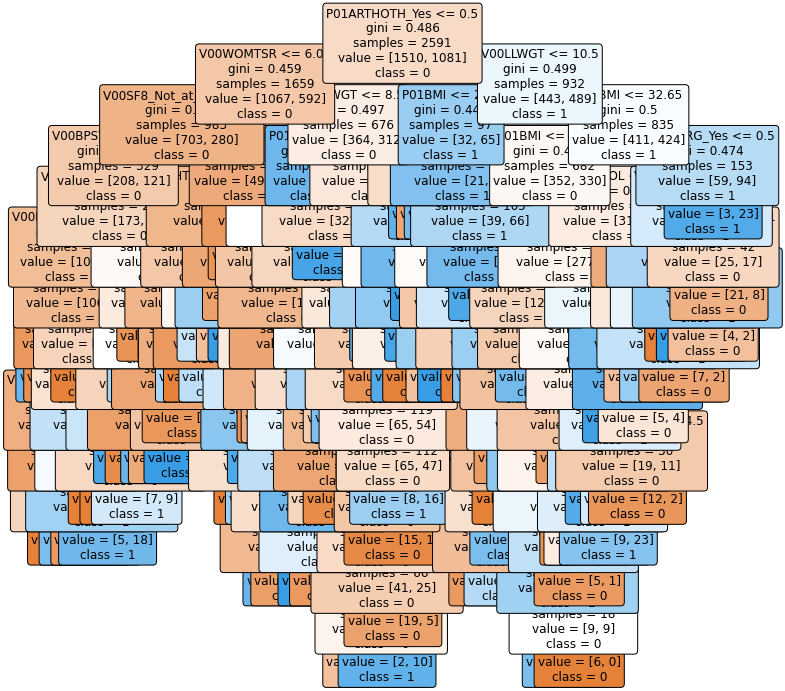

In [67]:
#Building the tree with 25 features
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('Node count =', dtc_new.tree_.node_count)
plt.figure(figsize=(12,12))
plot_tree(dtc, 
          feature_names=x_train_new.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) 
plt.show()

In [68]:
#Making predictions and building the confusion matrix
y_pred = dtc_new.predict(x_test_new)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
print('Accuracy :',precision_score(y_test, y_pred))
print('True positive Rate:',recall_score(y_test, y_pred))

Confusion Matrix : 
 [[404 243]
 [259 205]]
Accuracy : 0.4575892857142857
True positive Rate: 0.4418103448275862


In [88]:
#Crossvalidation
grid_values = {'ccp_alpha': np.linspace(0.0, 0.001, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc_new = GridSearchCV(dtc_new, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 
# default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc_new.fit(x_train_new, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.001,
                                              min_samples_leaf=5,
                                              random_state=88),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-06, 1.00e-05, 1.50e-05, 2.00e-05, 2.50e-05,
       3.00e-05, 3.50e-05, 4.00e-05, 4.50e-05, 5.00e-05, 5.50e-05,
       6.00e-05, 6.50e-05, 7.00e-05, 7.50e-05, 8.00e-05, 8.50e-05,
       9.00e-05, 9.50e-05, 1.00e-04, 1.05e-04, 1.10e-04, 1.15e-04...
       8.70e-04, 8.75e-04, 8.80e-04, 8.85e-04, 8.90e-04, 8.95e-04,
       9.00e-04, 9.05e-04, 9.10e-04, 9.15e-04, 9.20e-04, 9.25e-04,
       9.30e-04, 9.35e-04, 9.40e-04, 9.45e-04, 9.50e-04, 9.55e-04,
       9.60e-04, 9.65e-04, 9.70e-04, 9.75e-04, 9.80e-04, 9.85e-04,
       9.90e-04, 9.95e-04, 1.00e-03]),
                         'class_weight': [{0: 1, 1: 20}], 'max_depth': [30],
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                  

In [77]:
acc_new = dtc_cv_acc_new.cv_results_['mean_test_score'] 
# what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp_new = dtc_cv_acc_new.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp_new, 'Validation Accuracy': acc_new}).head(20)

,ccp alpha,Validation Accuracy
0,0,0.491691
1,5e-06,0.491691
2,1e-05,0.491691
3,1.5e-05,0.491691
4,2e-05,0.491691
5,2.5e-05,0.491691
6,3e-05,0.491691
7,3.5e-05,0.491691
8,4e-05,0.491691
9,4.5e-05,0.491691


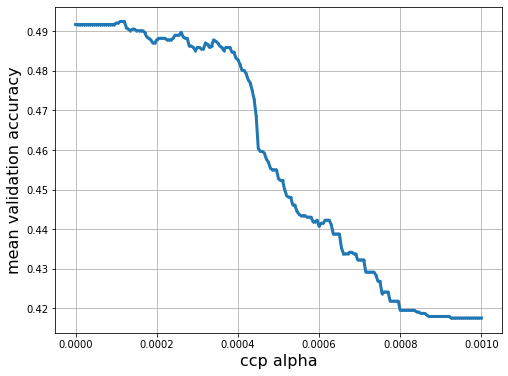

In [78]:
#Finidng the best ccp alpha value
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp_new, acc_new, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [89]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc_new.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc_new.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  8e-05
Grid best score (accuracy):  0.4866780516780517


In [91]:
#Building the confusion matrix to see the accuracy after cross validation
y_pred_new = dtc_cv_acc_new.best_estimator_.predict(x_test_new)
cm = confusion_matrix(y_test, y_pred_new)

print ("Confusion Matrix : \n", cm)
print('Accuracy:',precision_score(y_test, y_pred_new))
print('True Positive Rate:',recall_score(y_test, y_pred_new))

Confusion Matrix : 
 [[179 468]
 [109 355]]
Accuracy: 0.4313487241798299
True Positive Rate: 0.7650862068965517
